# Rossman便利店销量预测(新零售)
这是[便利店销量预测比赛](https://www.kaggle.com/c/rossmann-store-sales)的一个简单尝试参考。<br>


<p>Rossmann operates over 3,000 drug stores in 7 European countries. Currently, <br />Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.</p>
<p><span style="font-size: 1em; line-height: 1.5em;">In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! </span></p>
<p><span style="font-size: 1em; line-height: 1.5em;"> <img src="./image/rossmann.jpg" alt="" height="81" width="640" /><br /></span></p>
<p><em><span style="font-size: 1em; line-height: 1.5em;">If you are interested in joining Rossmann at their headquarters near Hanover, Germany, please contact Mr. Frank König (Frank.Koenig {at} rossmann.de) Rossmann is currently recruiting data scientists at <a href="http://www.rossmann.de/unternehmen/karriere/stellenboerse/stellenanzeigen~jid=3A5205E3-C4F9-4F5D-AA93-438D0B064D70~">senior</a> and <a href="http://www.rossmann.de/unternehmen/karriere/stellenboerse/stellenanzeigen~jid=F5142F37-C823-4767-B7CF-21DE3B351D66~">entry-level</a> positions.</span></em></p>

## 数据
<table id="data-files" class="nicetable full roomy align-top border">   
<thead>
    <tr>
        <th colspan="2">File Name</th> 
        <th>Available Formats</th>         
    </tr> 
</thead>

    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">sample_submission.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/sample_submission.csv.zip" name="sample_submission.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (55.25 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">store.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/store.csv.zip" name="store.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (8.33 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">test.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/test.csv.zip" name="test.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (143.25 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">train.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/train.csv.zip" name="train.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (5.66 mb)</a>                    </td>
        </tr>

    </tbody>
</table>

<p>You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.</p>

<h2>文件</h2>
<ul>
<li><strong>train.csv</strong> - historical data including Sales</li>
<li><strong>test.csv</strong> - historical data excluding Sales</li>
<li><strong>sample_submission.csv</strong> - a sample submission file in the correct format</li>
<li><strong>store.csv</strong> - supplemental information about the stores</li>
</ul>
** 字段说明**
<p>Most of the fields are self-explanatory. The following are descriptions for those that aren't.</p>
<ul>
<li><strong>Id</strong> - an Id that represents a (Store, Date) duple within the test set</li>
<li><strong>Store</strong> - a unique Id for each store</li>
<li><strong>Sales</strong> - the turnover for any given day (this is what you are predicting)</li>
<li><strong>Customers</strong> - the number of customers on a given day</li>
<li><strong>Open</strong> - an indicator for whether the store was open: 0 = closed, 1 = open</li>
<li><strong>StateHoliday</strong> - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None</li>
<li><strong>SchoolHoliday</strong> - indicates if the (Store, Date) was affected by the closure of public schools</li>
<li><strong>StoreType</strong> - differentiates between 4 different store models: a, b, c, d</li>
<li><strong>Assortment</strong> - describes an assortment level: a = basic, b = extra, c = extended</li>
<li><strong>CompetitionDistance</strong> - distance in meters to the nearest competitor store</li>
<li><strong>CompetitionOpenSince[Month/Year]</strong> - gives the approximate year and month of the time the nearest competitor was opened</li>
<li><strong>Promo</strong> - indicates whether a store is running a promo on that day</li>
<li><strong>Promo2</strong> - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating</li>
<li><strong>Promo2Since[Year/Week]</strong> - describes the year and calendar week when the store started participating in Promo2</li>
<li><strong>PromoInterval</strong> - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store</li>
</ul>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb 
plt.rcParams['figure.figsize'] = (12.0, 10.0)

## 加载数据

In [4]:
types = {'StateHoliday': np.dtype(str)}
train = pd.read_csv("./data/train.csv", parse_dates=[2], nrows=66901, dtype=types)
store = pd.read_csv("./data/store.csv")

## 数据探索

这个题目比较特殊，所有临时关门(比如特殊家假日，或者店主有事等等)的商店销量都应该为0，而开门的店应该都是有销量的。

In [5]:
not_open = train[(train['Open'] == 0) & (train['Sales'] != 0)]
print("确认closed的store是没有销量的: " + str(not_open.size == 0))

确认closed的store是没有销量的: True


In [6]:
no_sales = train[(train['Open'] == 1) & (train['Sales'] <= 0)]
print("开门的store都是有销量的: " + str(no_sales.size == 0))

开门的store都是有销量的: True


我们选出来所有有销量的样本做点分析。

In [7]:
train = train.loc[train['Sales'] > 0]
assert(train[train['Sales'] == 0].size == 0)

我们看一下数据的时间范畴。

In [6]:
dates = pd.to_datetime(train['Date'], format="%Y%m%d:%H:%M:%S.%f").sort_values()
dates = dates.unique()
start_date = dates[0]
end_date = dates[-1]
print("起始日期: ", start_date)
print("结束日期: ", end_date)
date_range = pd.date_range(start_date, end_date).values
assert(all(dates == date_range))

起始日期:  2015-06-01T00:00:00.000000000
结束日期:  2015-07-31T00:00:00.000000000


我们看一下数据趋势

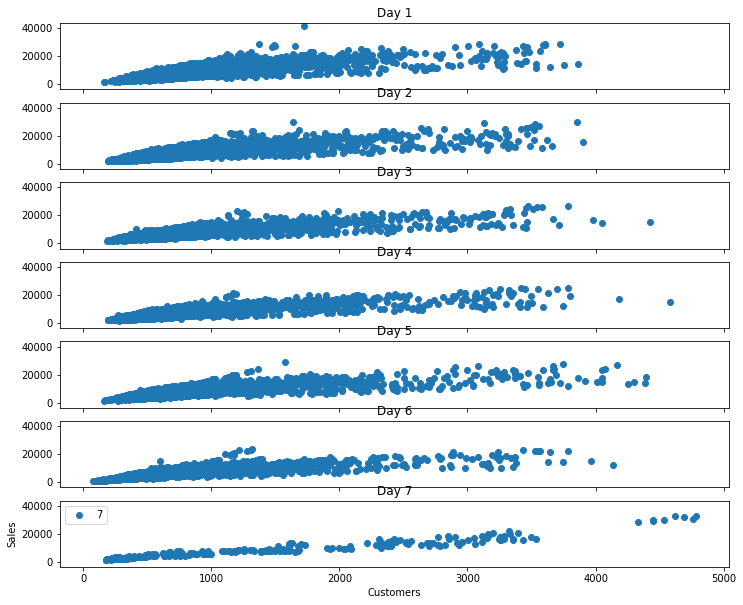

In [7]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
f, ax = plt.subplots(7, sharex=True, sharey=True)
for i in range(1, 8):
    mask = train[train['DayOfWeek'] == i]
    ax[i - 1].set_title("Day {0}".format(i))
    ax[i - 1].scatter(mask['Customers'], mask['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

As we can see, there is a general correlation between sales and customers.

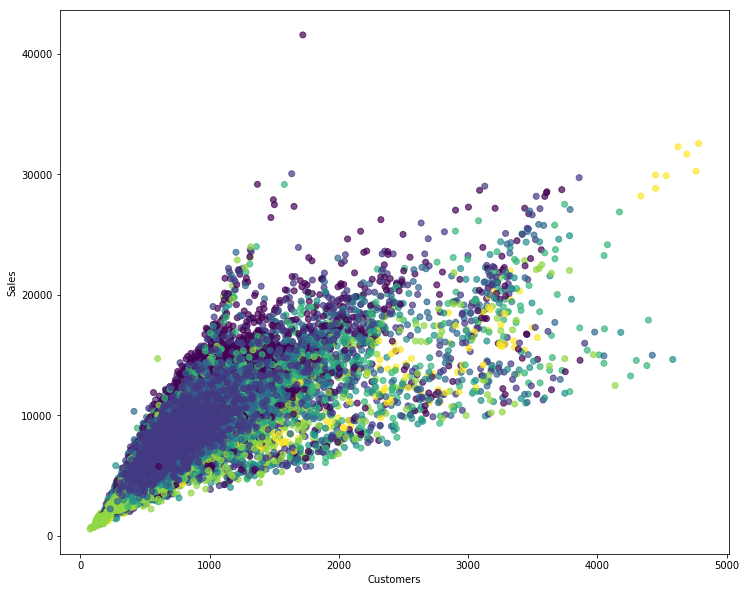

In [8]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'], alpha=0.7, cmap=plt.cm.get_cmap('viridis'))

plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

From above we see that there are various gradients for sales on different days.

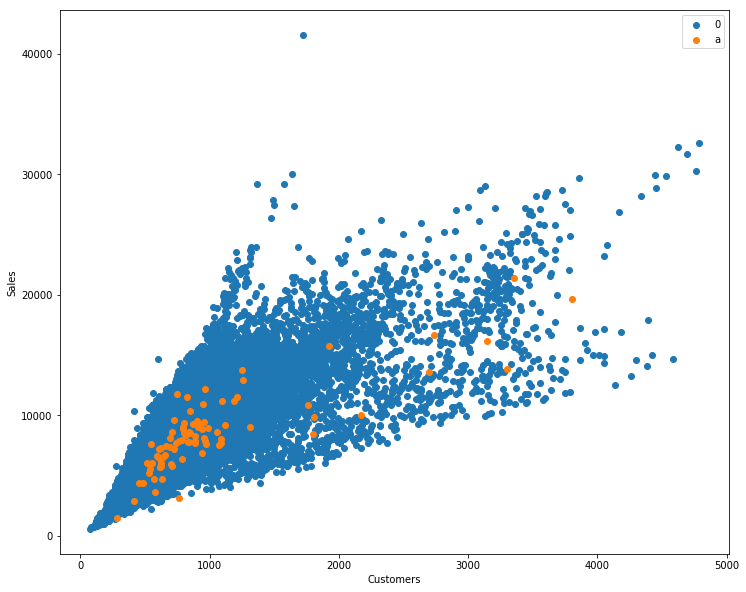

In [9]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
for i in ["0", "a", "b", "c"]:
    data = train[train['StateHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

可以看到，测试集中不包含复活节时间段，同时我们发现圣诞节比其他的节假日有更大的影响。

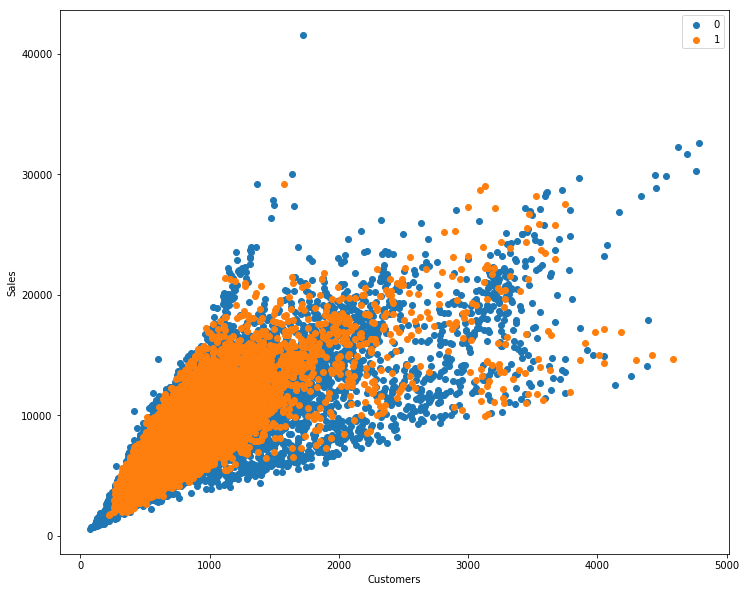

In [10]:
for i in [0, 1]:
    data = train[train['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

It appears that school holiday doesn't seem to have much of an impact.

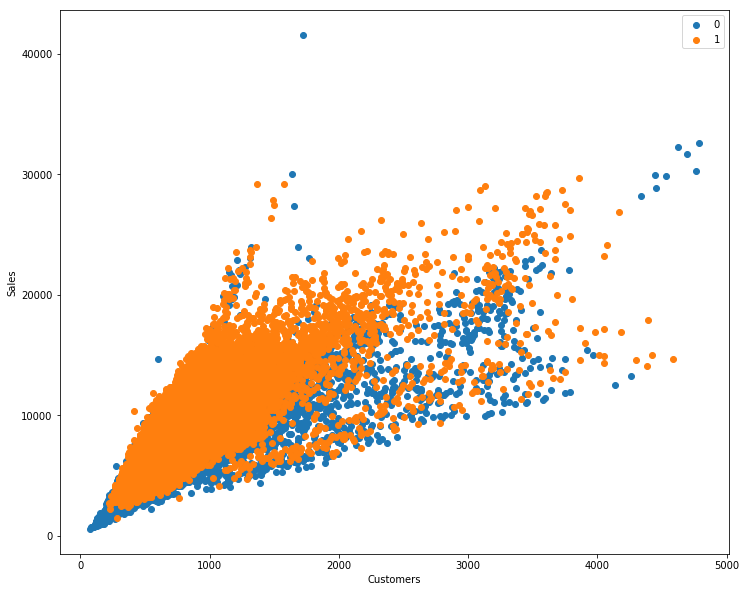

In [11]:
for i in [0, 1]:
    data = train[train['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

看起来促销信息对于两家店有类似的影响

我们来探究一下store.csv

In [8]:
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
store = pd.merge(avg_store.reset_index(), store, on='Store')
store.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4447.634615,510.211538,8.670743,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4998.769231,596.557692,8.459276,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,7095.274510,716.843137,9.785061,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9843.288462,1271.461538,7.702043,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4612.211538,522.980769,8.764831,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


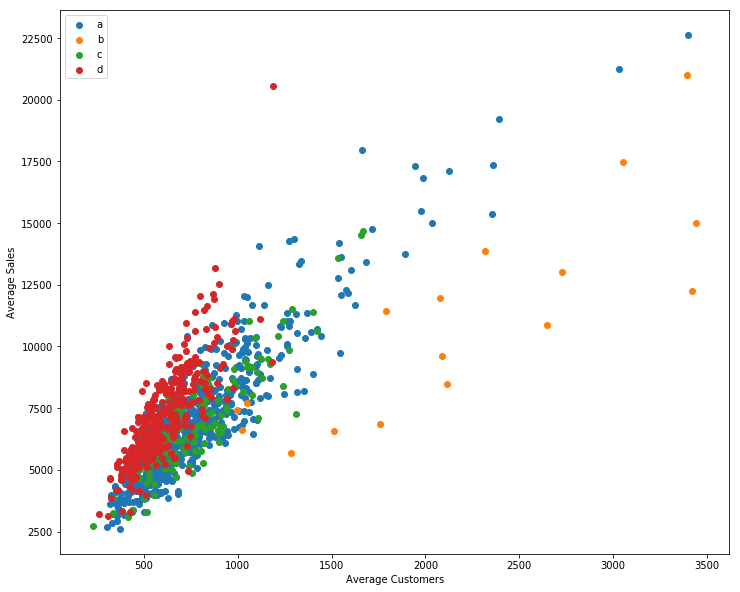

In [13]:
for i in ['a', 'b', 'c', 'd']:
    data = store[store['StoreType'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

'b'类型的药店，似乎sales是要更低的

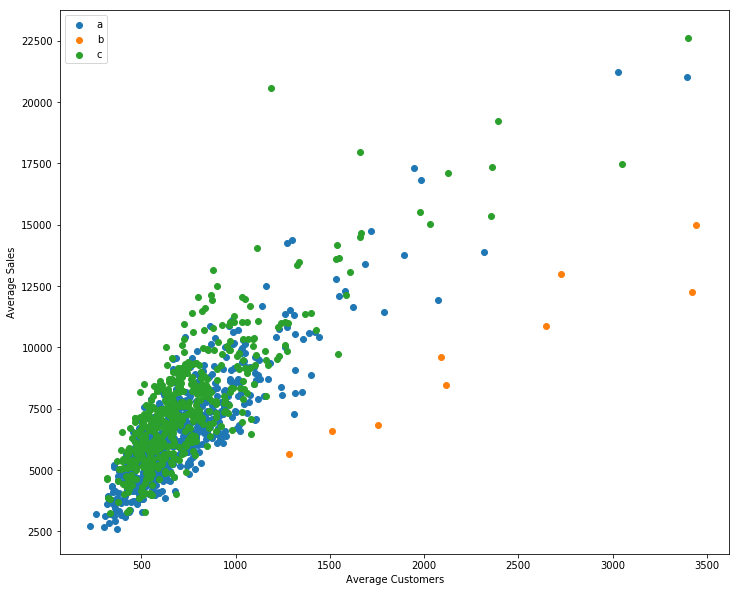

In [14]:
for i in ['a', 'b', 'c']:
    data = store[store['Assortment'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

发现的结果同上

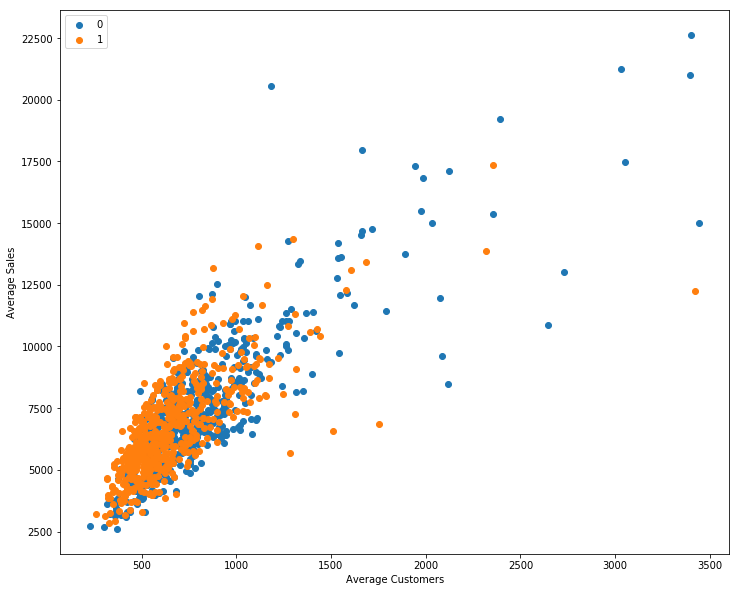

In [15]:
for i in [0, 1]:
    data = store[store['Promo2'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

看起来promo2对于平均销售是有促进作用的。

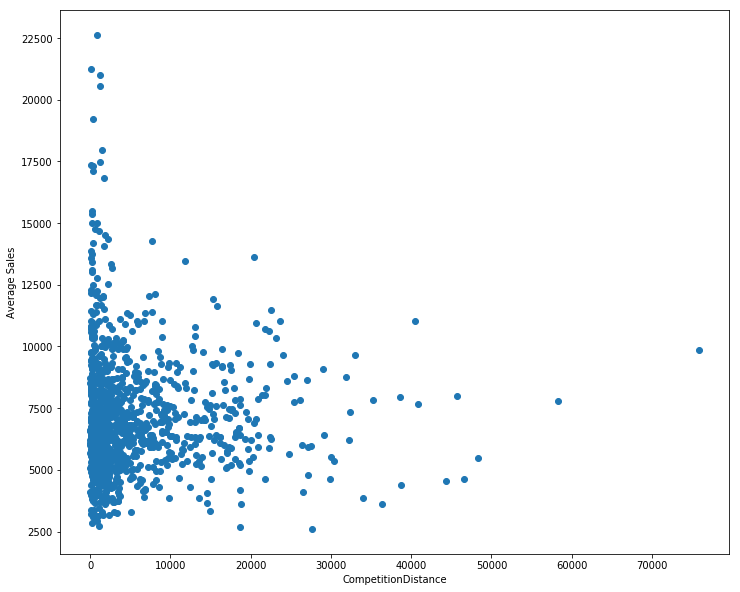

In [16]:
# fill NaN values
store["CompetitionDistance"].fillna(-1)
plt.scatter(store['CompetitionDistance'], store['AvgSales'])

plt.xlabel('CompetitionDistance')
plt.ylabel('Average Sales')
plt.show()

## 特征工程与模型构建

我们来构建一些基础的特征，比如**商店类型**，**Assortment/分类**，**节假日**，**日期年月日等**，同时我们这里打算使用树模型(和集成模型)来解决问题，因为可以偷个懒，我们可以暂时不做缺失值填充、数值型幅度缩放等处理。同时树模型也可以给我们特征的重要度。

In [9]:
def build_features(train, store):
    store['StoreType'] = store['StoreType'].astype('category').cat.codes
    store['Assortment'] = store['Assortment'].astype('category').cat.codes
    train["StateHoliday"] = train["StateHoliday"].astype('category').cat.codes

    merged = pd.merge(train, store, on='Store', how='left')
    
    # 移除缺失值
    NaN_replace = 0
    merged.fillna(NaN_replace, inplace=True)
    
    merged['Year'] = merged.Date.dt.year
    merged['Month'] = merged.Date.dt.month
    merged['Day'] = merged.Date.dt.day
    merged['Week'] = merged.Date.dt.week
    
    # 竞争对手已经存在的月数
    merged['MonthsCompetitionOpen'] = \
        12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + \
        (merged['Month'] - merged['CompetitionOpenSinceMonth'])
    merged.loc[merged['CompetitionOpenSinceYear'] ==
               NaN_replace, 'MonthsCompetitionOpen'] = NaN_replace
    
    # 促销已经存在的月数
    merged['WeeksPromoOpen'] = \
        12 * (merged['Year'] - merged['Promo2SinceYear']) + \
        (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
    merged.loc[merged['Promo2SinceYear'] == 
               NaN_replace, 'WeeksPromoOpen'] = NaN_replace

    toInt = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 
        'Promo2SinceYear', 
        'MonthsCompetitionOpen', 
        'WeeksPromoOpen'
    ]
    merged[toInt] = merged[toInt].astype(int)

    return merged

med_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
med_store.rename(columns=lambda x: 'Med' + x, inplace=True)

store = pd.merge(med_store.reset_index(), store, on='Store')
features = build_features(train, store)
features.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week,MonthsCompetitionOpen,WeeksPromoOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,...,0,0,0,0,2015,7,31,31,82,0
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,...,1,13,2010,"Jan,Apr,Jul,Oct",2015,7,31,31,92,78
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,...,1,14,2011,"Jan,Apr,Jul,Oct",2015,7,31,31,103,65
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457,...,0,0,0,0,2015,7,31,31,70,0
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,...,0,0,0,0,2015,7,31,31,3,0


In [10]:
from sklearn.model_selection import train_test_split
X = [
    'Store', 
#    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 

#     'SchoolHoliday',
    'StateHoliday',
    'StoreType',
    'Assortment',

    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedSalesPerCustomer',

    'DayOfWeek',
    'Week',
    'Day',
    'Month',
    'Year',

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',

#     'MonthsCompetitionOpen',
#     'WeeksPromoOpen'
]
X_train, X_test, y_train, y_test = train_test_split(
    features[X], features['Sales'], test_size=0.15, random_state=10)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# 自定义评估指标
def rmspe(y, y_hat):
    return np.sqrt(np.mean(((y - y_hat) / y) ** 2))

rmpse_scorer = make_scorer(rmspe, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, y_hat))

def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57497 entries, 0 to 66900
Data columns (total 10 columns):
Store               57497 non-null int64
DayOfWeek           57497 non-null int64
Date                57497 non-null datetime64[ns]
Sales               57497 non-null int64
Customers           57497 non-null int64
Open                57497 non-null int64
Promo               57497 non-null int64
StateHoliday        57497 non-null int8
SchoolHoliday       57497 non-null int64
SalesPerCustomer    57497 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(7), int8(1)
memory usage: 4.4 MB


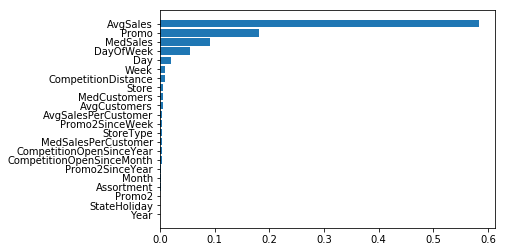

In [14]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
plot_importance(decision_tree)
train.info()

In [13]:
y_hat = decision_tree.predict(X_test)
score(decision_tree, X_train, y_train, y_test, y_hat)

Mean -0.147654239082608
Variance 3.8099214055457416e-05
RMSPE 0.1412797178946389


查看特征重要度

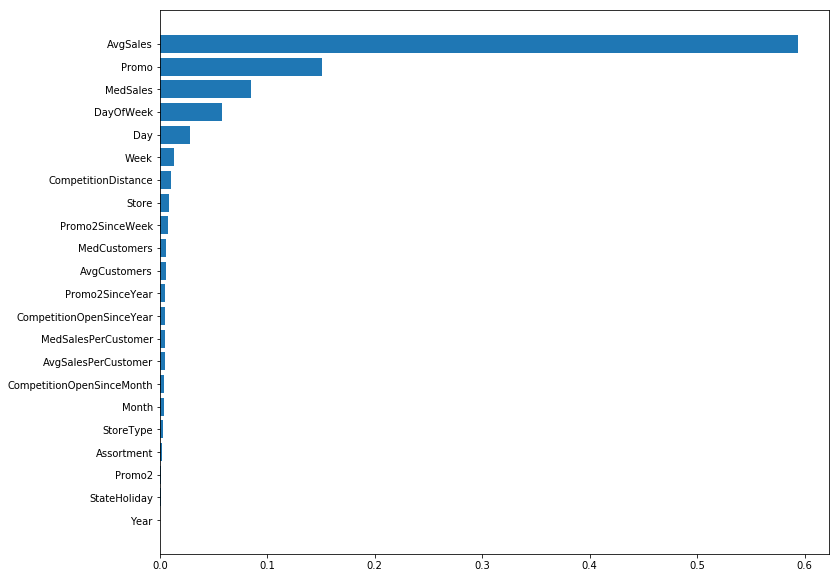

In [22]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_tree = AdaBoostRegressor(DecisionTreeRegressor())
adaboost_tree.fit(X_train, y_train)
plot_importance(adaboost_tree)

In [23]:
y_hat = adaboost_tree.predict(X_test)
score(adaboost_tree, X_train, y_train, y_test, y_hat)

Mean -0.10895843472354882
Variance 3.4873910336420195e-05
RMSPE 0.10265503227935915


试一下随机森林呢？

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.4s finished


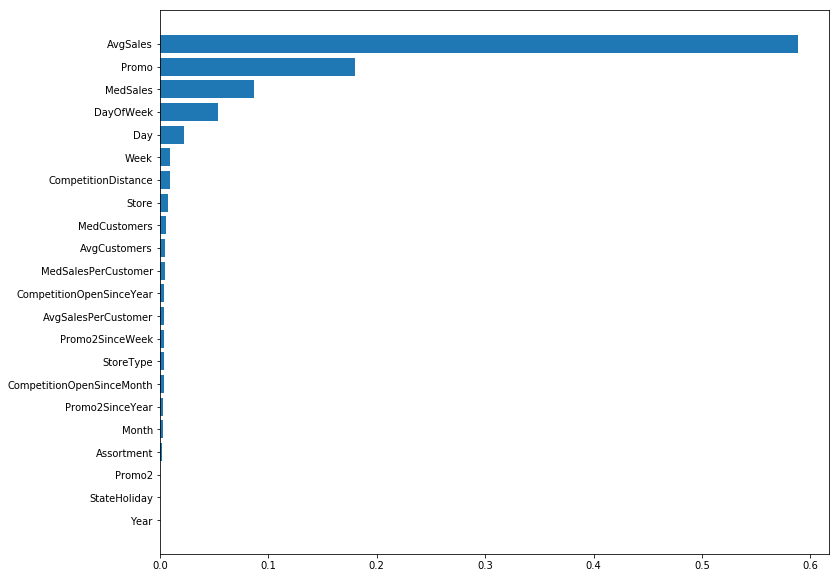

In [24]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(n_estimators=25, n_jobs=-1, verbose=1)
randomForest.fit(X_train, y_train)
plot_importance(randomForest)

In [25]:
y_hat = randomForest.predict(X_test)
score(randomForest, X_train, y_train, y_test, y_hat)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  2

Mean -0.11059404672468245
Variance 3.343945233041441e-05
RMSPE 0.10572894250073381


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:    0.0s finished


当然要上大杀器Xgboost了

In [35]:
import xgboost as xgb

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

xgboost_tree = xgb.XGBRegressor(
    n_jobs = -1,
    n_estimators = 2000,
    eta = 0.1,
    max_depth = 6,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.05,
    silent = 1,
    random_state = 2020
)
xgboost_tree.fit(X_train[X], np.log1p(y_train), 
                 eval_set = [(X_train[X], np.log1p(y_train)), (X_test[X], np.log1p(y_test))],
                 eval_metric = rmspe_xg,
                 early_stopping_rounds = 50,
                 verbose = 30
                )

[0]	validation_0-rmse:7.46376	validation_1-rmse:7.46953	validation_0-rmspe:0.999543	validation_1-rmspe:0.999545
Multiple eval metrics have been passed: 'validation_1-rmspe' will be used for early stopping.

Will train until validation_1-rmspe hasn't improved in 50 rounds.
[30]	validation_0-rmse:0.346038	validation_1-rmse:0.348014	validation_0-rmspe:0.287035	validation_1-rmspe:0.287587
[60]	validation_0-rmse:0.1248	validation_1-rmse:0.131668	validation_0-rmspe:0.132907	validation_1-rmspe:0.138322
[90]	validation_0-rmse:0.115976	validation_1-rmse:0.124594	validation_0-rmspe:0.123889	validation_1-rmspe:0.131634
[120]	validation_0-rmse:0.109791	validation_1-rmse:0.120216	validation_0-rmspe:0.115645	validation_1-rmspe:0.125762
[150]	validation_0-rmse:0.104179	validation_1-rmse:0.115932	validation_0-rmspe:0.108779	validation_1-rmspe:0.120534
[180]	validation_0-rmse:0.100378	validation_1-rmse:0.113041	validation_0-rmspe:0.104415	validation_1-rmspe:0.117196
[210]	validation_0-rmse:0.097157	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=2, missing=None,
       n_estimators=2000, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=2020, reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8)

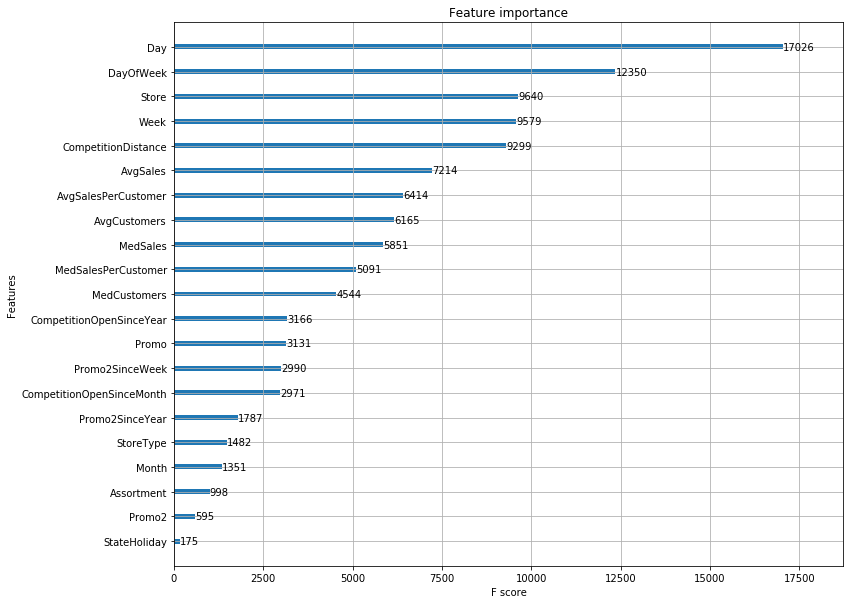

In [36]:
xgb.plot_importance(xgboost_tree)

In [37]:
def rmspe_exp(y, y_hat):
    return rmspe(np.expm1(y), np.expm1(y_hat))

rmpse_xg_scorer = make_scorer(rmspe_exp, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_xg_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, np.expm1(y_hat)))

y_hat = xgboost_tree.predict(X_test[X])
score(xgboost_tree, X_train[X], np.log1p(y_train), y_test, y_hat)

Mean -0.09227218239510641
Variance 1.9325449916714235e-05
RMSPE 0.08934742226712786


最后当然是要预估一下了

In [29]:
test = pd.read_csv("./data/test.csv", parse_dates=["Date"], dtype=types)
features = build_features(test, store)

y_hat = np.expm1(xgboost_tree.predict(features[X]))

df = pd.DataFrame({"Id": range(1, len(test) + 1), 'Sales': y_hat})
df.loc[test['Open'] == 0, 'Sales'] = 1
df.to_csv('submission.csv', index=False)